In [19]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from functools import reduce


In [28]:
#loading in the dataframes from the csv files, then merging the datasets together
file_names = ['Fertility.csv', 'GDP per capita.csv', 'Life expectancy.csv', 'Meat consumption.csv',
              'Median age.csv', 'Population growth.csv', 'Sex-ratio.csv', 'Suicide rate.csv']
dataframes = [pd.read_csv(file) for file in file_names]
merged_df = reduce(lambda left, right: pd.merge(left, right, on=['ISO-code', 'Country'], how='outer'), dataframes)


In [31]:
#renaming and standardizing columns
merged_df = merged_df.rename(columns={'Country':'country', 'ISO-code':'iso_code', 'Fertility':'fertility','GDP per capita':'gdp_per_capita', 'Life expectancy':'life_expectancy',
                                      'Meat consumption':'meat_consumption','Median age':'median_age','Population growth':'pop_growth', 'Sex-ratio':'sex_ratio', 'Suicide rate':'suicide_rate'})
merged_df = merged_df.dropna()

In [50]:
merged_df.head(20)

,country,fertility,iso_code,gdp_per_capita,life_expectancy,meat_consumption,median_age,pop_growth,sex_ratio,suicide_rate
0,Afghanistan,4.5,AFG,2182.0,64.5,17.3,27.4,2.41,1.03,6.4
2,Algeria,3.0,DZA,16091.0,76.7,18.3,28.1,1.89,1.03,3.3
4,Angola,5.5,AGO,6763.0,60.8,19.0,15.9,3.12,0.95,8.9
5,Antigua and Barbuda,2.0,ATG,30593.0,76.9,56.0,31.9,1.03,0.89,0.5
6,Argentina,2.3,ARG,19971.0,76.5,79.7,31.7,0.88,0.98,9.1
7,Armenia,1.8,ARM,11845.0,74.9,27.7,35.1,0.17,0.95,5.7
9,Australia,1.7,AUS,54799.0,83.3,108.2,38.7,1.60,0.99,11.7
10,Austria,1.5,AUT,55171.0,81.4,94.1,44.0,0.46,0.96,11.4
11,Azerbaijan,1.7,AZE,19156.0,72.9,15.9,32.3,1.35,0.98,2.6
12,Bahrain,2.0,BHR,51991.0,77.2,70.7,32.3,1.92,1.53,5.7


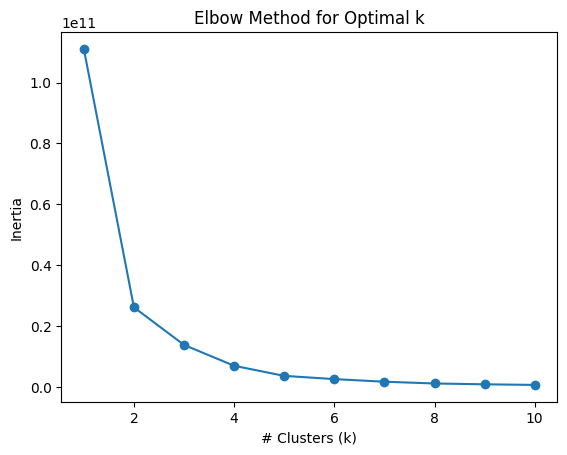

In [40]:
#finding elbow point for optimal k
inertia_values = []
for k in range(1, 11):  
    kmeans = KMeans(n_clusters=k, random_state=5, n_init=10)
    kmeans.fit(merged_df.drop(columns=['country', 'iso_code']))
    inertia_values.append(kmeans.inertia_)
    

plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('# Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

#shows 3 as the optimal number of clusters

In [41]:
#population growth columns
pop_df = merged_df[['country', 'iso_code','pop_growth', 'fertility', 'median_age']]
pop_df_num = pop_df[['pop_growth', 'fertility', 'median_age']]

In [48]:
kmeans = KMeans(n_clusters = 3)
cluster_labels = kmeans.fit_predict(pop_df_num)
pop_df_num['cluster'] = cluster_labels
pop_df_num

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_9869/1468346900.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_df_num['cluster'] = cluster_labels


,pop_growth,fertility,median_age,cluster
0,2.41,4.5,27.4,0
2,1.89,3.0,28.1,0
4,3.12,5.5,15.9,1
5,1.03,2.0,31.9,0
6,0.88,2.3,31.7,0
...,...,...,...,...
449,1.53,2.3,28.3,0
450,1.06,2.0,30.5,0
453,2.33,3.8,19.5,1
454,3.19,4.6,16.8,1


In [49]:
#showing average stats per cluster to help classify each cluster
cluster_groups = pop_df_num.groupby('cluster').mean()
cluster_groups

,pop_growth,fertility,median_age
cluster,,,
0,1.481167,2.443333,28.385000
1,2.498762,4.545928,19.504235
2,0.331321,1.587170,40.271698


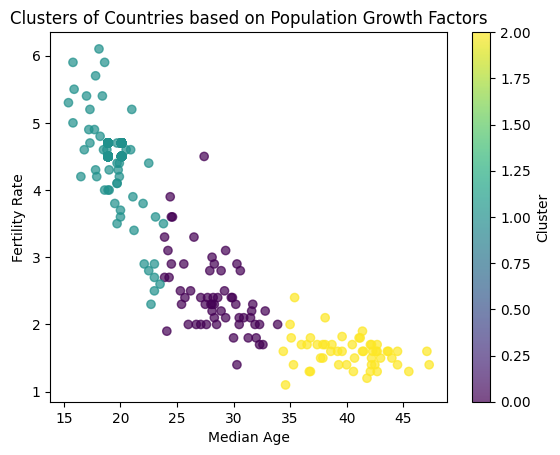

In [52]:
plt.scatter(pop_df_num['median_age'], pop_df_num['fertility'], c=pop_df_num['cluster'], alpha=0.7)
plt.xlabel('Median Age')
plt.ylabel('Fertility Rate')
plt.title('Clusters of Countries based on Population Growth Factors')
plt.colorbar(label='Cluster')
plt.show()